In [28]:
cd /content/drive/MyDrive/CIS project

/content/drive/.shortcut-targets-by-id/1lGT1YW0Lb8y3_7Namky8mLrZD84Kk5Ou/CIS project


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install scscope

     |████████████████████████████████| 454.3 MB 18 kB/s 
     |████████████████████████████████| 159 kB 75.8 MB/s 
     |████████████████████████████████| 1.4 MB 42.3 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
     |████████████████████████████████| 3.2 MB 57.3 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [4]:
pip install scanpy

     |████████████████████████████████| 2.0 MB 7.9 MB/s 
     |████████████████████████████████| 127 kB 66.8 MB/s 
     |████████████████████████████████| 80 kB 12.2 MB/s 
     |████████████████████████████████| 1.1 MB 54.2 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=1034c9945857d88e6696aaa243b363f60a1e190a30c7de67d8b7ccce8e0117f8
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52372 sha256=66d9e6a7056ed3071da076c66bda490370286b1376875314fe0ef2cd8aa63449
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=8f5223a275579fee5688af14169882eaa24948e65fb63be847f29136e578c824
  Stored in directory: /root/.cache

In [2]:
run main.py

Instructions for updating:
non-resource variables are not supported in the long term
Building Computational Graph on GPU-0


AttributeError: ignored

In [46]:
import scscope as DeepImpute

In [47]:
import pandas as pd
import phenograph
import pickle
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [48]:
import scanpy as sc

In [63]:
counts_drop = pd.read_csv('./data/counts_12.csv', header=0, index_col=0)
# ground trouth subpopulation assignment
cellinfo = pd.read_csv('./data/cellinfo_12.csv', header=0, index_col=0)

In [60]:
cellinfo.shape

(10196, 4)

In [52]:
counts_drop.shape

(10196, 3327)

In [53]:
cellinfo

,Cell,Batch,Group,ExplibSize
Cell1,Cell1,NaN,Group1,NaN
Cell2,Cell2,NaN,Group1,NaN
Cell3,Cell3,NaN,Group1,NaN
Cell4,Cell4,NaN,Group1,NaN
Cell5,Cell5,NaN,Group1,NaN
...,...,...,...,...
Cell10192,Cell10192,NaN,Group6,NaN
Cell10193,Cell10193,NaN,Group6,NaN
Cell10194,Cell10194,NaN,Group6,NaN
Cell10195,Cell10195,NaN,Group6,NaN


In [64]:
group = cellinfo.Group
label_ground_truth = []
for g in group:
    g = int(g.split('Group')[1])
    label_ground_truth.append(g)

In [12]:
group.shape

(157981,)

In [65]:
gene_expression = sc.AnnData(counts_drop.values)
# normalize each cell to have same count number
sc.pp.normalize_per_cell(gene_expression, min_counts = 0)
# update data structure to use normalized data
gene_expression = gene_expression.X

In [7]:
gene_expression = sc.AnnData(counts_drop.values)

In [56]:
gene_expression.shape

(10196, 3327)

In [11]:
print(sc.pp.normalize_per_cell(gene_expression))

None


In [14]:
gene_expression

array([[0.        , 0.43749997, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.1666666 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [10]:
  latent_dim = 50

In [ ]:
DI_model = DeepImpute.train(
            gene_expression, latent_dim, T=2, batch_size=512, max_epoch=50,num_gpus = 4)

Building Computational Graph on GPU-0
Building Computational Graph on GPU-1
Building Computational Graph on GPU-2
Building Computational Graph on GPU-3


In [13]:
gene_expression.shape

(157981, 3327)

In [14]:
p = gene_expression[1:100][:]
p.shape

(99, 3327)

In [61]:
latent = np.empty((0,100))
for i in range(0, int(len(gene_expression)) + 1, 1000):
    small_latent, _, __ = DeepImpute.predict(
        gene_expression[i:i + 1000], DI_model)
    latent = np.vstack((latent,small_latent))


In [49]:
latent.shape[0]

107837

Scalable clustering:
Use 20 subsets of cells for initially clustering...
	K-means clustering for 0 subset.
Finish intially clustering by K-means.
Start PhenoGraph clustering...

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 13.247524499893188 seconds
Jaccard graph constructed in 3.735344409942627 seconds
Wrote graph to binary file in 1.2442781925201416 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.71429
Louvain completed 21 runs in 17.848782777786255 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 36.71162176132202 seconds
Finish density down-sampling clustering.
0.5867000386427547


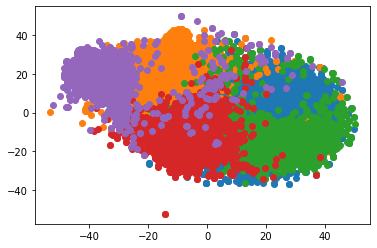

In [62]:
label = DeepImpute.scalable_cluster(latent,kmeans_num = 20)
  # evaluate
ARI = adjusted_rand_score(label, label_ground_truth)

print(ARI)


X_embedded = TSNE(n_components=2).fit_transform(latent)

# visualization of the subpopulation using tSNE
plt.figure()
for i in range(5):
    idx = np.nonzero(label == i)[0]
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1])
plt.show()

In [16]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow._api.v2.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import random
import time
import phenograph
from sklearn.cluster import KMeans

In [17]:


latent_code = latent
kmeans_num=200
cluster_num=400
display_step=50
phenograh_neighbor=30
print('Scalable clustering:')
print('Use %d subsets of cells for initially clustering...' % kmeans_num)
stamp = np.floor(np.linspace(0, latent_code.shape[0], kmeans_num + 1))
stamp = stamp.astype(int)

cluster_ceter = np.zeros([kmeans_num * cluster_num, latent_code.shape[1]])
mapping_sample_kmeans = np.zeros(latent_code.shape[0])

for i in range(kmeans_num):

    low_bound = stamp[i]
    upp_bound = stamp[i + 1]
    sample_range = np.arange(low_bound, upp_bound)
    select_sample = latent_code[sample_range, :]

    kmeans = KMeans(n_clusters=cluster_num,
                    random_state=0).fit(select_sample)
    label = kmeans.labels_

    for j in range(cluster_num):
        cluster_sample_idx = np.nonzero(label == j)[0]
        cluster_sample = select_sample[cluster_sample_idx, :]
        cluster_ceter[i * cluster_num + j,
        :] = np.mean(cluster_sample, axis=0)
        mapping_sample_kmeans[sample_range[cluster_sample_idx]
        ] = i * cluster_num + j

    if i % display_step == 0:
        print('\tK-means clustering for %d subset.' % i)

print('Finish intially clustering by K-means.')
print('Start PhenoGraph clustering...\n')

Scalable clustering:
Use 200 subsets of cells for initially clustering...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (282) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


	K-means clustering for 0 subset.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (175) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (146) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=F

	K-means clustering for 50 subset.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (213) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (199) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=F

	K-means clustering for 100 subset.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (264) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (261) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=F

	K-means clustering for 150 subset.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (381) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: ConvergenceWarning: Number of distinct clusters (331) found smaller than n_clusters (400). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=F

Finish intially clustering by K-means.
Start PhenoGraph clustering...



In [26]:
label_pheno, graph, Q = phenograph.cluster(
    cluster_ceter, k=phenograh_neighbor, n_jobs=1)

label = np.zeros(latent_code.shape[0])
for i in range(label_pheno.max() + 1):
    center_index = np.nonzero(label_pheno == i)[0]
    for j in center_index:
        sample_index = np.nonzero(mapping_sample_kmeans == j)[
            0]  # samples belong to this center
        label[sample_index] = i
print('Finish density down-sampling clustering.')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 344.7258405685425 seconds
Jaccard graph constructed in 38.33963441848755 seconds
Wrote graph to binary file in 10.424511432647705 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.867139
Louvain completed 21 runs in 258.14260053634644 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 652.6852688789368 seconds
Finish density down-sampling clustering.


In [89]:
cluster_ceter

0.0

In [68]:
cluster_ceter[cluster_ceter > 100] = 0

In [73]:
np.isinf(cluster_ceter).any()

np.isfinite(cluster_ceter).all()

np.isnan(cluster_ceter).any()

True

In [22]:
np.isinf(cluster_ceter).any()

False

In [23]:
np.isfinite(cluster_ceter).all()

False

In [24]:
np.isnan(cluster_ceter).any()

True

In [83]:
np.isnan(cluster_ceter)

False

In [25]:
cluster_ceter[np.isnan(cluster_ceter)] = 0

0.022416745662144008


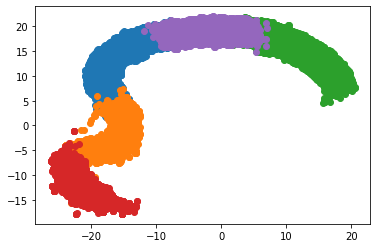

In [27]:
ARI = adjusted_rand_score(label, label_ground_truth)

print(ARI)


X_embedded = TSNE(n_components=2).fit_transform(latent_code)

# visualization of the subpopulation using tSNE
plt.figure()x
for i in range(5):
    idx = np.nonzero(label == i)[0]
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1])
plt.show()

In [113]:
label

array([ 3.,  2., 36., ...,  1.,  0., 15.])

In [115]:
len(label_ground_truth)

157981